In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from faker import Faker

# 显示中文标签
plt.style.use('seaborn')
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 智慧政法大数据项目案例

**项目简介**：智慧政法大数据中心的建设是为了充分发挥政法委信息化的优势，整合现有资源，打破部门壁垒，实现各政法机关部门的互联互通和资源共享，建立政法大数据中心，借助大数据关联分析和人工智能应用，实现对社会不稳定因素的及时发现、预警、分析和预测。积极推进实现中央政法委、监察委员会等单位的数据共享需求，建立社会感知全面、业务协同流畅、部门联动灵敏、人工智能强大的工作体系。

**业务挑战：**
* 行业业务模型少：做好政法业务的深度分析和挖掘，提升业务人员智能化管理和领导的决策指挥是非常重要的，但也是政法大数据项目建设和项提升的难点，因为政法业务模型的梳理和分析是一个全新的领域，没有成功经验可参考。
    
    
* 数据质量低：从政法体系各个渠道、通过各种手段采集来的数据如果不经过有效的数据规整，不仅会增加系统查询、统计上的复杂程度，降低系统的运行效率，而且无法有效的发挥数据的深层价值，辅助进行决策支持与智能分析，因此除了在数据标准规范上要做好充分准备和贯彻外，还需要有完整、高效、可扩展的数据规整技术支撑，以提高数据的应用价值。


* 数据来源多：数据采集是政法大数据中心建设所需数据资源的核心途径。需要采集的数据包括法院相关信息数据、检察院相关信息数据、公安相关信息数据、司法局相关信息数据、民政局、信访办、团市委、教委、卫计委、地铁运营公司、社工委、经信委等部门的数据；另外还需要与市辖区县进行数据的采集工作，因此在数据方面不仅采集对象多，而且格式和标准不同，采集的数据内容、数据类型、数据来源多样化且采集频度较高。


* 内外网系统工作量大：很多政法数据存在于政务外网当中，如法、检、公、司、民等部门以及其他部门的数据资源，甚至舆情信息存在于互联网当中，根据保密要求，互联网数据和政务外网数据不可以直接通过有线及无线链路交互和共享给政务内网，因此如何做好政务内外网数据的交互和共享以及内外网数据的一致性是本项目的难点。


* 国产化替代难度大：政法体系信息化系统属于涉密系统，根据国家保密和信息化建设相关规定，涉密信息系统建设必须采用国产化软硬件产品，产品要求必须在国家安全可靠产品名录里面。由于各政法委原有信息系统在建设过程中很多都没有按照国产化产品来建设，使用的硬件设备、软件中间件产品、开源软件包括很多国外产品和品牌，以及不符合国家对信息系统建设安全可靠要求。如何做好对原有系统进行国产化替换是本项目的难点。

**系统总览**：
* 大数据分析应用：通过大数据的汇聚与分析实现政法委在辖内政法系统的统一的监督管理和指挥调度，同时为领导决策提供数据支撑，实时对不稳定因素的及时发现、预警、分析和精确预测。


* 可视化决策支持系统：利用大数据、数据挖掘、数据可视化等技术手段，对政府政法委当前的政法工作、矛盾纠纷、维稳情况、刑事案件及邪教处理的重点信息等资源进行数据分析，对分析结果以数据图表等可视化形式进行展现。


* **社会稳定指数系统**：通过大数据汇聚和分析手段，由选定的与社会稳定紧密相关的关键指标数据，通过合理赋权，计算各指标变化趋势和相对程度，从而评价政府各级机构的社会稳定综合状况。指标通过民生、政治、经济、社会4个方面进行展现，帮助决策者了解哪些领域的社会治理存在较大问题会影响社会稳定程度，政府应加强在该领域的监管，推动社会治理政策的有效落实。


* 员额智能管理系统：通过对接同级法院/检察院的队伍建设系统获取员额法官/检察官的档案信息，包括个人履历信息、奖惩信息、绩效信息、工资奖金信息、办案质效信息、入额成绩等，用以构建员额从入额到退额的全流程画像。


在这里，我们主要演示**社会稳定指数系统**。


## 社会稳定指数系统

社会稳定指数系统是指通过大数据汇聚和分析手段，由选定的与社会稳定紧密相关的关键指标数据，通过合理赋权，计算各指标变化趋势和相对程度，从而评价政府各级机构的社会稳定综合状况。

指标通过民生、政治、经济、社会4个方面进行展现，帮助决策者了解哪些领域的社会治理存在较大问题会影响社会稳定程度，政府应加强在该领域的监管，推动社会治理政策的有效落实。


* 民生指标：
    * 社会水平指数：人均可支配收入变化率、职工年均带薪假期、家庭越均外出就餐次数、恩格尔系数等
    * 社会保障指数：社会保障基金缺口率、社会保障覆盖率、民间慈善组织的比例、财政社会保障支出占GDP之比等
    * 利益保障指数：社会纠纷媒体曝光率、工会比值损害消费者权益申诉次数、业主委员会覆盖率等


* 政治稳定指标：
    * 腐败指数：重大私发腐败案件增长率、司法错判率、公务员经济犯罪案件比例等
    * 政治透明指数：听证会年均召开次数、重大事件召开新闻发布会比例、官员财产公开比例等
    * 社会参与指数：非政府组织的增长率、参与志愿者活动人数和比值等


* 经济支撑指标：
    * **经济健康指数**：食品通胀率、核心通胀率、核心消费者物价指数、居民消费价格指数CPI、商业信息指数、消费者信息指数、零售销售、通货膨胀率等
    * 社会痛苦指数：离婚率、精神病院人数、离职率、自杀率等
    * 贫富差距指数：中产阶级收入阶层结构指标等


* 社会安全指标：
    * 公共安全指数:交通事故死亡率、食品安全事故发生率、医疗事故发生率、疾病传染率、违法犯罪类刑事案件等）
    * 个人安全指数:个人信息保密程度等
    * 生活安全指数:失业率、环境污染指数
    * 自然灾害指数:包含各种自然灾害发生的次数（包含洪涝、生物灾害、干旱、风雹等），受灾人口、死亡人口、紧急转移安置次数、房屋倒塌次数、农作物受灾面积、成灾面积、绝收面积、直接经济损失等:
    * 社会舆论指数:负面舆情数量，包含涉稳类、敏感类、极端类、涉官类、普通类等

我们从上面可以得知，每个指标里面包含的每个指数都需要相关业务专家帮助建模完成的，比如说经济支撑指标中的经济健康指数，哪些特征可以反映出经济的健康指数，我们得到一些举例包含食品通胀率、核心通胀率、通货膨胀率等等，而且这些数字分别代表了什么含义，比如每月通货膨胀率平均值为1%，某月通货膨胀率达到了5%，这可能意味着物价水平的上涨失控，所以需要国家政策来帮助物价恢复稳定。

### 1 构造数据

我们根据业务需求来构造一份简单的数据来演示该系统如何计算的。假设以下构造的数据为**A市经济支撑指标的经济健康指数的各方汇集的数据**，共有8个表分别记录了2016年到2021年共6年的**有关经济健康指数的表**（包含食品通胀率、核心通胀率、通货膨胀率、核心消费者物价指数、居民消费价格指数CPI、商业信息指数、消费者信息指数、零售销售）。

In [61]:
# 构造数据
columns = ['区1','区2','区3']
index = pd.date_range('2016-01-01','2021-12-31',freq='M')
n = len(index)

# 构造食品通胀率表
data1 = np.random.normal(loc=1,scale=1,size=(n,len(columns)))
food_inflation = pd.DataFrame(data1, columns=columns, index =index)

# 构造核心通胀率
data2 = np.random.normal(loc=1.5,scale=1,size=(n,len(columns)))
main_inflation = pd.DataFrame(data2, columns=columns, index =index)

# 通货膨胀率
data3 = np.random.normal(loc=2,scale=1,size=(n,len(columns)))
inflation = pd.DataFrame(data3, columns=columns, index =index)

# 构造核心消费者物价指数
data4 = np.random.normal(loc=101,scale=1,size=(n,len(columns)))
core_cpi = pd.DataFrame(data4, columns=columns, index =index)

# 居民消费价格指数CPI
data5 = np.random.normal(loc=106,scale=1,size=(n,len(columns)))
cpi = pd.DataFrame(data5, columns=columns, index =index)

# 商业信息指数
data6 = np.random.normal(loc=50,scale=1,size=(n,len(columns)))
bci = pd.DataFrame(data6, columns=columns, index =index)

# 消费者信息指数
data7 = np.random.normal(loc=120,scale=5,size=(n,len(columns)))
cci = pd.DataFrame(data7, columns=columns, index =index)

# 零售销售(月率环比)
data8 = np.random.normal(loc=0,scale=1,size=(n,len(columns)))
rs = pd.DataFrame(data8, columns=columns, index =index)


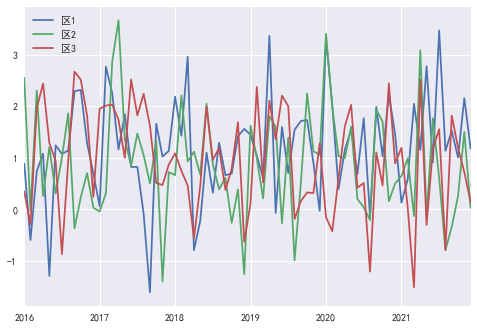

In [62]:
# 查看食品通胀率表
food_inflation.plot()

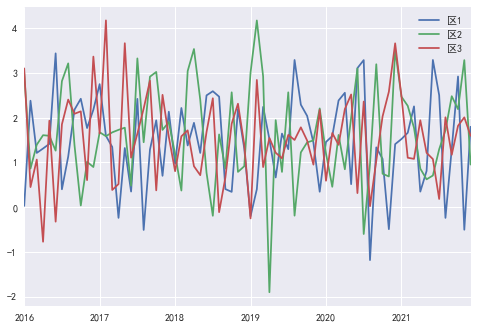

In [63]:
# 查看核心通胀率
main_inflation.plot()

### 2 数据分析

上面构建的8张表，就是各部门分别统计的有关经济健康指数的数据表，然后汇聚到一个沙箱中进行数据处理和数据分析。我们的目的将每张表的数据通过拟合的函数转化为百分制的数字，再通过每张表加权平均处理，最终得到一个百分制数字来代表经济健康指数。

注意：拟合的函数和加权平均的参数需要业务专家的帮助。


#### 2.1 通货膨胀率表为例
我们以**通货膨胀率表**为例，来演示如何拟合函数。比如，我们通过业务专家的帮助，得到了最近5年中国通货膨胀率的信息：
* 通货膨胀率每月平均在2%是经济比较平稳的体现，差值在1%是一个合理的区间
* 差值在1%到2%表示经济不太平稳,有待观察
* 差值在2%-3%表示经济不平稳，需要国家采取措施
* 差值大于3%表示经济问题严峻，需要采取强力措施

In [64]:
# 查看通货膨胀率表
inflation

,区1,区2,区3
2016-01-31,1.907091,3.390656,1.554950
2016-02-29,2.506549,4.467148,2.041110
2016-03-31,1.350661,2.874222,1.752321
2016-04-30,0.225352,1.784657,2.259752
2016-05-31,3.201178,1.169360,0.783481
...,...,...,...
2021-08-31,1.026058,2.136253,2.444500
2021-09-30,1.840247,2.664810,3.106991
2021-10-31,2.206081,2.093103,1.033577
2021-11-30,-0.045535,1.096598,1.119176


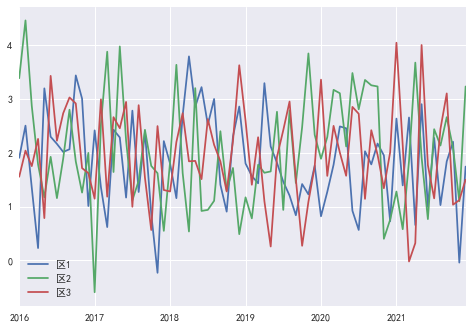

In [65]:
# 查看通货膨胀率折线图
inflation.plot()

我们根据专家提供的信息，可以简单建模如下：
* 若通货膨胀率在：[1%,3%] 区间，分数为90分到100分，2%为100分。
* 若通货膨胀率在：[0%,1%] 或 [3%,4%] 区间，分数为60分到90分。
* 若通货膨胀率在：[-1%,0%] 或 [4%,5%] 区间，分数为50分到60分。
* 若通货膨胀率在：-1%以下 或 5% 以上，分数为固定30分。

In [66]:
# 定义分数转换函数
def inflation_transfer(data):
    res = pd.Series([0] * len(data))
    for i in range(len(data)):
        score = 0
        x = data[i]
        if 1 <= x <= 3:
            score = 100 - (np.abs(x - 2) * (100 - 90))
        elif 0 <= x < 1:
            score = 90 - (np.abs(x - 1) * (90 - 60))
        elif 3 < x <= 4:
            score = 90 - (np.abs(x - 3) * (90 - 60))
        elif -1 <= x < 0:
            score = 60 - (np.abs(x - 0) * (60 - 50))
        elif 4 < x <= 5:
            score = 60 - (np.abs(x - 4) * (60 - 50))
        elif x < -1 or x > 5:
            score = 30
        res[i] = score
    
    return res

In [67]:
# 进行通货膨胀率的转换
inflation_score = inflation.apply(inflation_transfer,axis=0)
inflation_score.index = index
inflation_score

,区1,区2,区3
2016-01-31,99,78,95
2016-02-29,94,55,99
2016-03-31,93,91,97
2016-04-30,66,97,97
2016-05-31,83,91,83
...,...,...,...
2021-08-31,90,98,95
2021-09-30,98,93,86
2021-10-31,97,99,90
2021-11-30,59,90,91


In [68]:
# 求出三个区的每年的通货膨胀率的平均值
inflation_region_mean = inflation_score.resample('y').mean()
inflation_region_mean

,区1,区2,区3
2016-12-31,90.250000,90.000000,92.333333
2017-12-31,89.083333,84.416667,90.750000
2018-12-31,89.333333,87.250000,93.416667
2019-12-31,93.166667,90.333333,89.583333
2020-12-31,91.666667,85.416667,93.500000
2021-12-31,89.583333,89.500000,82.416667


通过上表，我们就可以比较A市3区的通货膨胀指数，再求平均，就可求得该市每年的通货膨胀指数。

In [69]:
# 求该市每年的通货膨胀指数
inflation_region_mean['平均值'] = inflation_region_mean.mean(axis=1).round(2)
inflation_region_mean

,区1,区2,区3,平均值
2016-12-31,90.250000,90.000000,92.333333,90.86
2017-12-31,89.083333,84.416667,90.750000,88.08
2018-12-31,89.333333,87.250000,93.416667,90.00
2019-12-31,93.166667,90.333333,89.583333,91.03
2020-12-31,91.666667,85.416667,93.500000,90.19
2021-12-31,89.583333,89.500000,82.416667,87.17


#### 2.2 推广到经济健康指数有关的数据表

上节演示了如何通过原始数据表，通过简单建模得到了通货膨胀指数，现在我们把该算法流程推广到8张数据表，然后根据权重（根据业务专家给出），加权平均即可求出A市的经济健康指数。

In [70]:
# 假设我们已经推广到了8张表,并合并到了merge_table
merge_data = np.random.randint(low=75, high=95, size=(6, 8))
columns_merge = ['食品通胀率', '核心通胀率', '核心消费者物价指数', '居民消费价格指数CPI',
                 '商业信息指数', '消费者信息指数', '零售销售', '通货膨胀率']
index_merge = inflation_region_mean.index
merge_table = pd.DataFrame(merge_data, index=index_merge, columns=columns_merge)
merge_table

,食品通胀率,核心通胀率,核心消费者物价指数,居民消费价格指数CPI,商业信息指数,消费者信息指数,零售销售,通货膨胀率
2016-12-31,78,91,84,92,75,94,80,76
2017-12-31,84,77,76,84,86,89,94,89
2018-12-31,89,91,93,86,84,87,89,83
2019-12-31,92,75,79,91,78,85,85,79
2020-12-31,92,75,76,86,81,94,88,86
2021-12-31,83,94,75,84,76,86,86,75


In [78]:
# 根据权重得到每年的经济健康指数
weights = [0.1,0.1,0.1,0.1,0.1,0.1,0.2,0.2]
merge_table['经济健康指数'] = merge_table.mul(weights, axis=1).sum(axis=1)
merge_table

,食品通胀率,核心通胀率,核心消费者物价指数,居民消费价格指数CPI,商业信息指数,消费者信息指数,零售销售,通货膨胀率,经济健康指数
2016-12-31,78,91,84,92,75,94,80,76,82.6
2017-12-31,84,77,76,84,86,89,94,89,86.2
2018-12-31,89,91,93,86,84,87,89,83,87.4
2019-12-31,92,75,79,91,78,85,85,79,82.8
2020-12-31,92,75,76,86,81,94,88,86,85.2
2021-12-31,83,94,75,84,76,86,86,75,82.0


#### 2.3 推广到经济支撑指标有关的数据表

经济支撑指标共包含三个指数：经济健康指数，社会痛苦指数，贫富差距指数。我们已经得出经济健康指数，按照同样的方法推广到另外两个指数，再加权平均，即可得到A市5年间的经济支撑指标。

In [84]:
# 进行加权平均得出经济支撑指标
weights_economy = [0.3,0.3,0.4]
economy_table['经济支撑指标'] = economy_table.mul(weights_economy, axis=1).sum(axis=1)
economy_table

,经济健康指数,社会痛苦指数,贫富差距指数,经济支撑指标
2016-12-31,87,89,91,89.2
2017-12-31,81,83,92,86.0
2018-12-31,83,93,83,86.0
2019-12-31,90,81,86,85.7
2020-12-31,86,89,81,84.9
2021-12-31,93,93,94,93.4


#### 2.4 推广到社会稳定指数有关的数据表

社会稳定指数共包含民生指标、政治稳定指标、经济支撑指标、社会安全指标。我们通过以上分析已经得出经济支撑指标，通过相同算法流程即可求出另外三个指标，再加权平均，即可得出最终的社会稳定指数。

In [96]:
# 构造已整理好的社会稳定指数表
stability_data = np.random.randint(low=75, high=95, size=(6, 4))
columns_stability = ['民生指标', '政治稳定指标', '经济支撑指标', '社会安全指标']
index_stability = merge_table.index

stability_table = pd.DataFrame(
    data=stability_data, columns=columns_stability, index=index_stability)
stability_table

,民生指标,政治稳定指标,经济支撑指标,社会安全指标
2016-12-31,78,83,76,89
2017-12-31,75,83,78,83
2018-12-31,86,78,92,84
2019-12-31,75,90,81,86
2020-12-31,77,78,89,76
2021-12-31,76,83,91,86


In [97]:
# 进行加权平均得出社会稳定指数
weights_stability = [0.2,0.3,0.2,0.3]
stability_table['社会稳定指数'] = stability_table.mul(weights_stability, axis=1).sum(axis=1)
stability_table

,民生指标,政治稳定指标,经济支撑指标,社会安全指标,社会稳定指数
2016-12-31,78,83,76,89,82.4
2017-12-31,75,83,78,83,80.4
2018-12-31,86,78,92,84,84.2
2019-12-31,75,90,81,86,84.0
2020-12-31,77,78,89,76,79.4
2021-12-31,76,83,91,86,84.1
